# Data Visualisation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('imbalanced_self_aware_data.csv')
df.head()

,respiratory_rate,blood_oxygen,blood_sugar,systolic_bp,diastolic_bp,heart_rate,class
0,21.20,93.95,140.35,130.51,57.17,63.57,0
1,21.65,93.78,137.90,128.30,57.11,98.43,0
2,21.59,93.65,142.45,127.64,58.28,99.21,0
3,21.77,93.44,140.45,126.50,58.84,72.77,0
4,21.35,94.01,137.66,130.67,58.10,85.45,0


In [5]:
df.shape

(6500, 7)

In [6]:
df.describe()

,respiratory_rate,blood_oxygen,blood_sugar,systolic_bp,diastolic_bp,heart_rate,class
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,20.051162,97.739678,103.619894,120.920971,56.336662,87.278817,2.353846
std,5.239401,4.979031,33.556860,21.393841,2.636388,30.141786,1.461732
min,10.800000,90.920000,64.010000,81.000000,48.000000,40.010000,0.000000
25%,21.040000,93.640000,73.260000,126.220000,54.920000,62.460000,1.000000
50%,21.580000,94.640000,75.610000,128.870000,56.735000,84.110000,3.000000
75%,22.660000,103.260000,139.452500,131.640000,58.370000,109.980000,4.000000
max,30.000000,105.000000,143.000000,156.000000,60.000000,149.990000,4.000000


Text(0.5, 23.38159722222222, '')

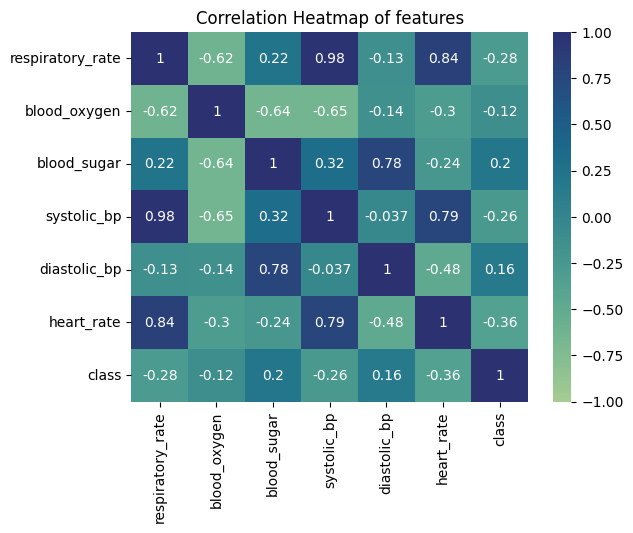

In [7]:
ax = sns.heatmap(
    data=df.corr(),
    cmap="crest",
    vmin=-1,
    annot=df.corr()

)
ax.set_title("Correlation Heatmap of features")
ax.set_xlabel(ax.get_xlabel(), rotation=15)

<Axes: title={'center': 'Class distribution of dataset'}>

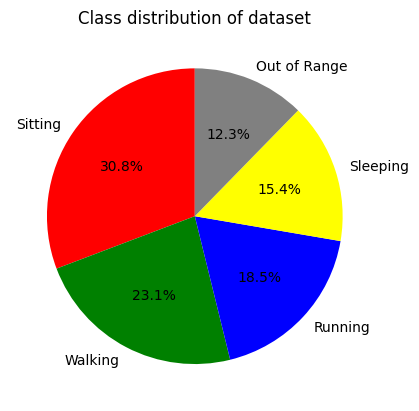

In [8]:
df['class'].value_counts().plot(kind='pie', startangle=90, autopct='%.1f%%', ylabel='', title='Class distribution of dataset', labels=['Sitting', 'Walking', 'Running', 'Sleeping', 'Out of Range'], colors=['red', 'green', 'blue', 'yellow', 'gray'])


In [9]:
from imblearn.combine import SMOTEENN
X = df.drop('class', axis=1)
y = df['class']

smote_enn = SMOTEENN(sampling_strategy='auto')
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)

<Axes: title={'center': 'Updated class distribution of dataset'}>

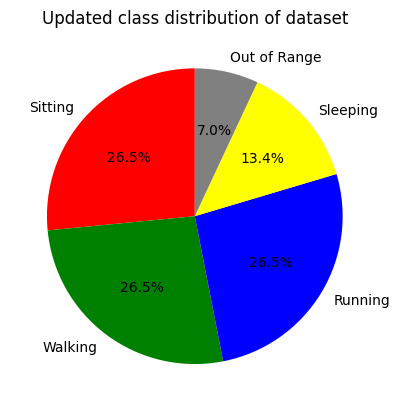

In [10]:
df['class'].value_counts().plot(kind='pie', startangle=90, autopct='%.1f%%', ylabel='', title='Updated class distribution of dataset', labels=['Sitting', 'Walking', 'Running', 'Sleeping', 'Out of Range'], colors=['red', 'green', 'blue','yellow','gray'])


Text(0.5, 0.98, 'Kernel Density Estimate (KDE) Plots for each feature by class label')

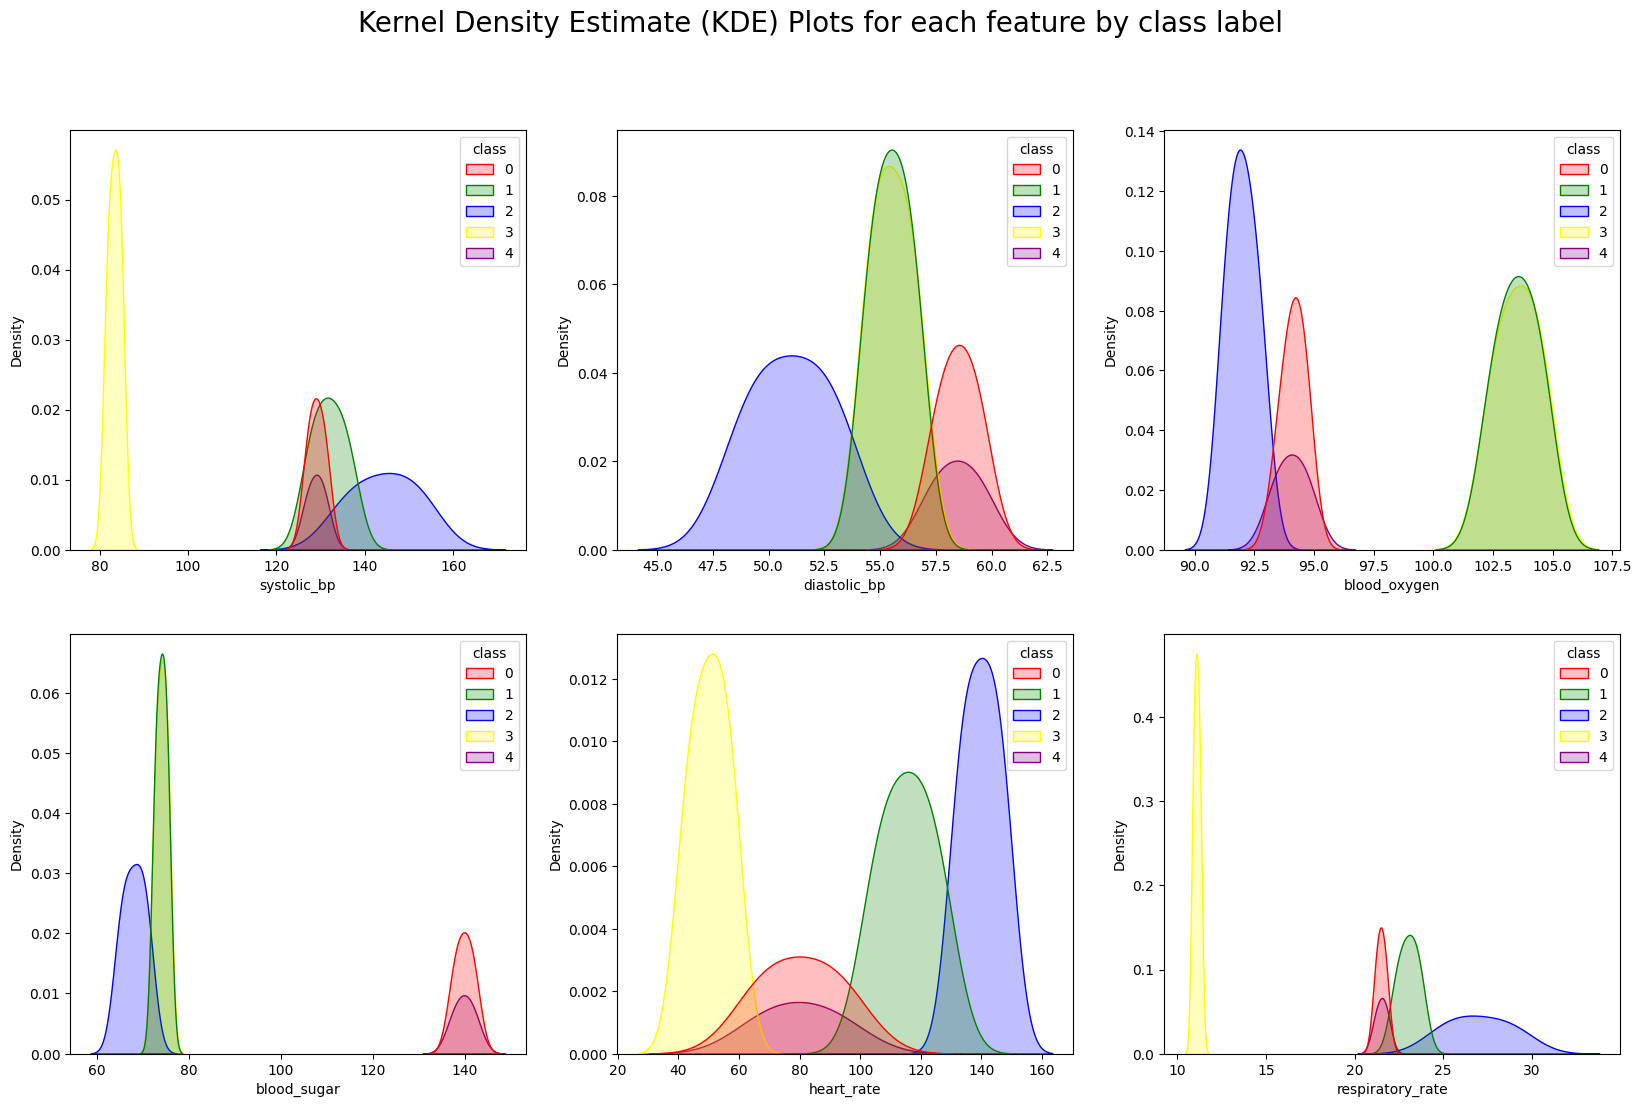

In [11]:
# Define a custom color palette for the 5 classes
custom_palette = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple'}

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.kdeplot(data=df, x='systolic_bp', hue='class', fill=True, bw_adjust=3.5, ax=axes[0, 0], palette=custom_palette)
sns.kdeplot(data=df, x='diastolic_bp', hue='class', fill=True, bw_adjust=3.5, ax=axes[0, 1], palette=custom_palette)
sns.kdeplot(data=df, x='blood_oxygen', hue='class', fill=True, bw_adjust=3.5, ax=axes[0, 2], palette=custom_palette)
sns.kdeplot(data=df, x='blood_sugar', hue='class', fill=True, bw_adjust=3.5, ax=axes[1, 0], palette=custom_palette)
sns.kdeplot(data=df, x='heart_rate', hue='class', fill=True, bw_adjust=3.5, ax=axes[1, 1], palette=custom_palette)
sns.kdeplot(data=df, x='respiratory_rate', hue='class', fill=True, bw_adjust=3.5, ax=axes[1, 2], palette=custom_palette)

plt.suptitle('Kernel Density Estimate (KDE) Plots for each feature by class label', fontsize=20)


## Data Modeling

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Function to run and evaluate each model - Evaluation is done on the basis of:
* Average Accuracy over a Ten-Fold Cross Validation
* Precision Score
* Recall Score
* F1 Score

In [24]:
param_grid = {
    'Random Forest Classifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Decision Tree Classifier': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'K-Nearest Neighbors Classifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Hist Gradient Boosting Classifier': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_leaf': [1, 2, 4],  
        'l2_regularization': [0.0, 0.1, 0.2] 
    }
}


In [18]:
def evaluate_models(models):
    results_df = pd.DataFrame(
        columns=['Best Parameters', 'Average Accuracy (10 Folds Cross-Val)', 'Precision', 'Recall', 'F1 Score'])

    for model, model_name in models:
        print(f'Training {model_name}...')
        model.fit(x_train, y_train)
        
        best_params = model.best_params_
        best_model = model.best_estimator_
        
        y_pred = best_model.predict(x_test)
        
        metrics = {
            'Best Parameters': best_params,
            'Average Accuracy (10 Folds Cross-Val)': model.best_score_,
            'Precision': precision_score(y_pred, y_test, average='macro'),
            'Recall': recall_score(y_pred, y_test, average='macro'),
            'F1 Score': f1_score(y_pred, y_test, average='macro')
        }
        
        results_df.loc[model_name] = metrics

    return results_df

In [26]:
classification_models = [
    (
        GridSearchCV(
            HistGradientBoostingClassifier(),
            param_grid.get("Hist Gradient Boosting Classifier", {}),
            cv=10,
            n_jobs=-1,
        ),
        "Histogram Gradient Boosting Classifier",
    ),
    (
        GridSearchCV(
            RandomForestClassifier(),
            param_grid.get("Random Forest Classifier", {}),
            cv=10,
            n_jobs=-1,
        ),
        "Random Forest Classifier",
    ),
    (
        GridSearchCV(
            DecisionTreeClassifier(),
            param_grid.get("Decision Tree Classifier", {}),
            cv=10,
            n_jobs=-1,
        ),
        "Decision Tree Classifier",
    ),
    (
        GridSearchCV(
            KNeighborsClassifier(),
            param_grid.get("K-Nearest Neighbors Classifier", {}),
            cv=10,
            n_jobs=-1,
        ),
        "K-Nearest Neighbors Classifier",
    ),
    (
        GridSearchCV(
            RandomForestClassifier(),
            param_grid.get("Guassian Naive Bayes Classifier", {}),
            cv=10,
            n_jobs=-1,
        ),
        "Naive Bayes Classifier",
    ),
]

model_results = evaluate_models(classification_models)

Training Histogram Gradient Boosting Classifier...
Training Random Forest Classifier...
Training Decision Tree Classifier...
Training K-Nearest Neighbors Classifier...
Training Naive Bayes Classifier...


In [27]:
model_results.sort_values(by='Average Accuracy (10 Folds Cross-Val)', ascending=False)

,Best Parameters,Average Accuracy (10 Folds Cross-Val),Precision,Recall,F1 Score
K-Nearest Neighbors Classifier,"{'n_neighbors': 3, 'weights': 'distance'}",0.965945,0.930820,0.947269,0.936997
Histogram Gradient Boosting Classifier,"{'l2_regularization': 0.2, 'learning_rate': 0....",0.953119,0.866958,0.879742,0.870419
Random Forest Classifier,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.950464,0.864529,0.884190,0.868528
Naive Bayes Classifier,{},0.947144,0.861649,0.880432,0.865321
Decision Tree Classifier,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.942062,0.845883,0.846699,0.846252


In [1]:
predictions = [m.predict(x_test) for m in (model[0] for model in classification_models)]
class_names = ["Sitting", "Walking", "Running", "Sleeping", "No Activity"]
cms = [confusion_matrix(y_test, y_pred) for y_pred in predictions]
color_palette = cmap=sns.dark_palette("#1f5982", as_cmap=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

sns.heatmap(cms[0], cmap=color_palette, fmt="", ax=axes[0], xticklabels=class_names, yticklabels=class_names, annot=cms[0])
sns.heatmap(cms[1], cmap=color_palette, fmt="", ax=axes[1], xticklabels=class_names, yticklabels=class_names, annot=cms[1])
sns.heatmap(cms[2], cmap=color_palette, fmt="", xticklabels=class_names, yticklabels=class_names, annot=cms[2])

for i, ax in enumerate(axes):
    ax.set_title(classification_models[:3][i][1])
    ax.set_ylabel("Predicted")
    ax.set_xlabel("Actual")

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.heatmap(cms[3], cmap=color_palette, fmt="", ax=axes[0], xticklabels=class_names, yticklabels=class_names, annot=cms[3])
sns.heatmap( cms[4], cmap=color_palette, fmt="", ax=axes[1], xticklabels=class_names, yticklabels=class_names, annot=cms[4])

for i, ax in enumerate(axes):
    ax.set_title(classification_models[3:5][i][1])
    ax.set_ylabel("Predicted")
    ax.set_xlabel("Actual")

NameError: name 'classification_models' is not defined

In [35]:
import joblib


best_model_name = model_results.sort_values(by='Average Accuracy (10 Folds Cross-Val)', ascending=False).index[0]

best_model = next(model for model, name in classification_models if name == best_model_name)

joblib.dump(best_model, 'self_awareness_model.pkl')

['self_awareness_model.pkl']